In [1]:
from IPython.display import Image
Image(url='https://faithmag.com/sites/default/files/styles/article_full/public/2018-09/titanic2.jpg?h=6521bd5e&itok=H8td6QVv')

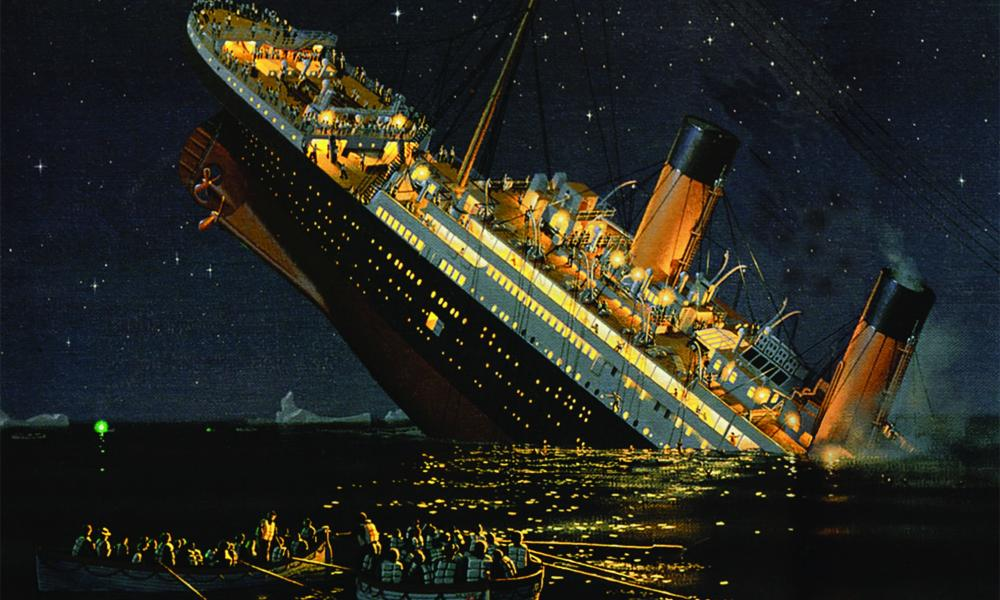

In [2]:
Image('C:\\wonyoung\\titanic2.jpg')

In [3]:
import pandas as pd
train=pd.read_csv('C:/wonyoung/titanic.csv')

In [4]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train['Embarked'].astype('category')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: category
Categories (3, object): [C, Q, S]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [11]:
#bar chart: Pclass, Sex, SibSp, Parch, Embarked, Cabin
#성별 생존유무의 인원수를 막대그래프로



In [12]:
survived=train[train['Survived']==1]['Sex'].value_counts()
survived

female    233
male      109
Name: Sex, dtype: int64

In [13]:
dead=train[train['Survived']==0]['Sex'].value_counts()
dead

male      468
female     81
Name: Sex, dtype: int64

In [14]:
df=pd.DataFrame([survived, dead],index=['survived','dead'])
df

,female,male
survived,233,109
dead,81,468


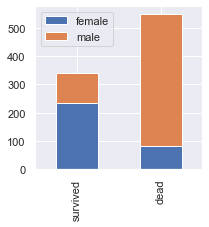

In [15]:
survived=train[train['Survived']==1]['Sex'].value_counts()
dead=train[train['Survived']==0]['Sex'].value_counts()
df=pd.DataFrame([survived, dead],index=['survived','dead'])
df.plot(kind='bar',stacked=True,figsize=(3,3))

In [16]:
#Pclass별 생존유무인원수

In [17]:
train['Pclass'].astype('category')

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

In [18]:
survived_pclass=train[train['Survived']==1]['Pclass'].value_counts()
dead_pclass=train[train['Survived']==0]['Pclass'].value_counts()

In [19]:
survived_pclass

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [20]:
dead_pclass

3    372
2     97
1     80
Name: Pclass, dtype: int64

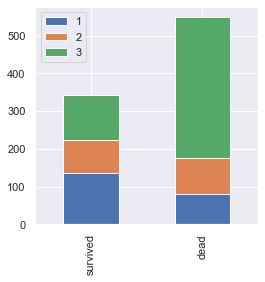

In [21]:
survived_pclass=train[train['Survived']==1]['Pclass'].value_counts()
dead_pclass=train[train['Survived']==0]['Pclass'].value_counts()
df2=pd.DataFrame([survived_pclass,dead_pclass],index=['survived','dead'])
df2.plot(kind='bar',stacked=True,figsize=(4,4))

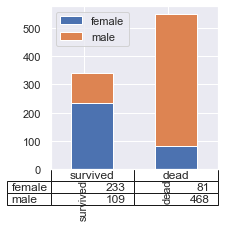

In [22]:
survived=train[train['Survived']==1]['Sex'].value_counts()
dead=train[train['Survived']==0]['Sex'].value_counts()
df=pd.DataFrame([survived, dead],index=['survived','dead'])
df.plot(kind='bar',stacked=True,figsize=(3,3),table=True,legend=True, position=0.3)

In [23]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead],index=['survived','dead'])
    df.plot(kind='bar',stacked=True,figsize=(3,3))

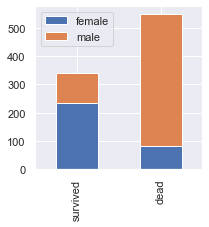

In [24]:
bar_chart('Sex')

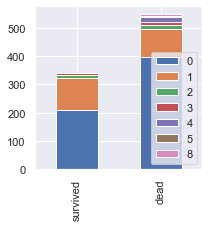

In [25]:
bar_chart('SibSp')

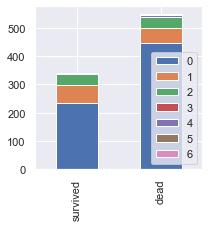

In [26]:
bar_chart('Parch')

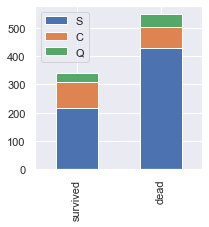

In [27]:
bar_chart('Embarked')

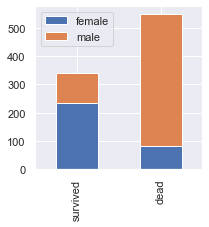

In [28]:
bar_chart('Sex')

In [29]:
b=train.groupby('Pclass').agg({'Age':'max','SibSp':'sum','Fare':'mean'})
b.columns=['Max of Age','Sum of SibSp','Mean of Fare']
b

,Max of Age,Sum of SibSp,Mean of Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


In [30]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
train['Title']=train['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)


train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [32]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Lady          1
Capt          1
Sir           1
Jonkheer      1
Countess      1
Don           1
Name: Title, dtype: int64

In [33]:
##1번

Title1=[]
for i in train['Title']:
    if i =='Mr':
        a = 0
        Title1.append(a)
    elif i=='Miss':
        a=1
        Title1.append(a)
    elif i=='Mrs':
        a=2
        Title1.append(a)
    else:
        a=3
        Title1.append(a)    
    
train['Title1']=Title1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0


In [34]:
##2번

train['Title2']=2
for r in range(0,len(train)):
    if train.iloc[r,12]=='Mr':
        train.iloc[r,14]=0
        
    elif train.iloc[r,12]=='Miss':
        train.iloc[r,14]=1
        
    elif train.iloc[r,12]=='Mrs':
        train.iloc[r,14]=2
    else:
        train.iloc[r,14]=3
    
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0,0


In [35]:
##3번

title_mapping={'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':3, 'Rev':3, 'Mlle':3,'Col':3, 'Major':3, 'Don':3, 'Lady':3, 'Capt':3, 'Jonkheer':3, 'Countess':3, 'Mme':3, 'Sir':3, 'Ms':3}

train['Title3']=train['Title'].map(title_mapping)
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0


In [36]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Lady          1
Capt          1
Sir           1
Jonkheer      1
Countess      1
Don           1
Name: Title, dtype: int64

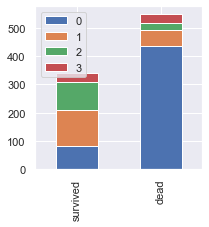

In [37]:
bar_chart('Title1')

In [38]:
del train['Name']   # train.drop('Name',axis=1,inplace=True )

In [39]:
train01=train.copy()
train01

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0


In [40]:
# male=0 female=1
train_01=train.copy()
train_01

newsex=[]
for i in train01['Sex']:
    if i == 'male':
        b = 0
        newsex.append(b)
    else:
        b = 1
        newsex.append(b)

train['Sex']=newsex
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0


In [41]:
mapping_sex={'male':0,'female':1}
train01['Sex']=train01['Sex'].map(mapping_sex)

In [42]:
train01

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0


In [43]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title1           0
Title2           0
Title3           0
dtype: int64

In [44]:
#타이틀별 나이 중앙값(median)으로 null값 대체

In [45]:
train.groupby('Title1')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [46]:
train['Age'].fillna(train.groupby('Title1')['Age'].transform('median'),inplace=True)
train
train['Age1']=train['Age']
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3,Age1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,22.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2,38.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,26.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,35.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3,27.0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,19.0
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1,21.0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0,26.0


In [47]:
train.isnull().sum()  #pd.isnull(train).sum()와 같음

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title1           0
Title2           0
Title3           0
Age1             0
dtype: int64

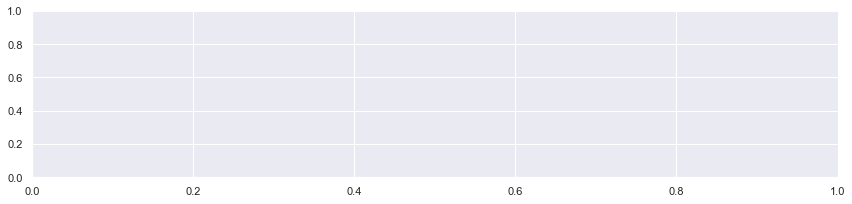

In [48]:
sns.FacetGrid(train, hue='Survived', aspect=4)  #그림 그릴 영역 만들기. aspect=높이

(0.0, 20.0)

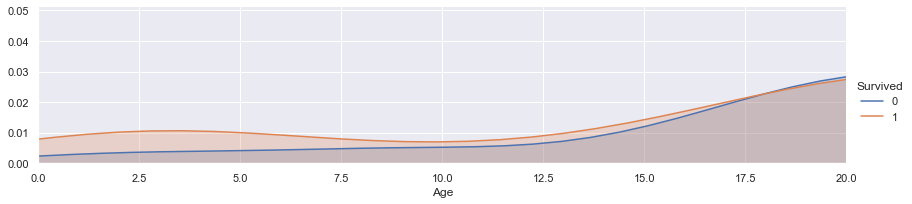

In [49]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4) #hue=기준
facet.map(sns.kdeplot,'Age',shade=True)  #shade=그래프색칠
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

In [50]:
def chart_kdeplot(feature,x_min,x_max):
    facet=sns.FacetGrid(train, hue='Survived', aspect=4)
    facet.map(sns.kdeplot,'Age',shade=True)  #shade=그래프색칠
    facet.set(xlim=(0,train['Age'].max()))
    facet.add_legend()
    plt.xlim(x_min,x_max)

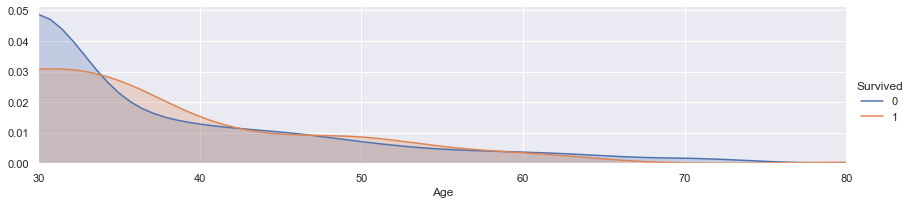

In [51]:
chart_kdeplot('Age',30,80)

In [52]:
#나이대별
#child:0
#young:1
#adult:2
#mid-age:3
#senior:4

In [53]:
train.loc[train['Age1']<=16,'Age1']=0
train.loc[(train['Age1']>16) & (train['Age1']<=26),'Age1']=1
train.loc[(train['Age1']>26) & (train['Age1']<=36),'Age1']=2
train.loc[(train['Age1']>36) & (train['Age1']<=62),'Age1']=3
train.loc[train['Age1']>62,'Age1']=4
train['Age1'].value_counts()

2.0    336
1.0    255
3.0    180
0.0    105
4.0     15
Name: Age1, dtype: int64

In [54]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3,Age1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,1.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2,3.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3,2.0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,1.0
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1,1.0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0,1.0


In [55]:
train03=train.copy() #나이완료
train03

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3,Age1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,1.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2,3.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3,2.0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,1.0
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1,1.0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0,1.0


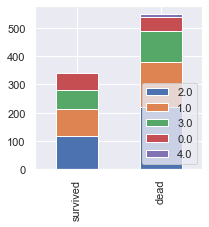

In [56]:
bar_chart('Age1')

In [57]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title1           0
Title2           0
Title3           0
Age1             0
dtype: int64

In [58]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3,Age1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,1.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2,3.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3,2.0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,1.0
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1,1.0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0,1.0


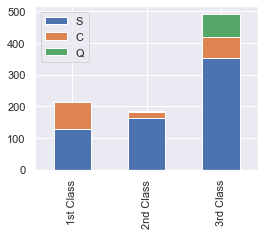

In [59]:
#클래스별 Embarked
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3], index=['1st Class','2nd Class','3rd Class'])
df.plot(kind='bar', stacked=True, figsize=(4,3))

In [60]:
train['Embarked1']=train['Embarked'].fillna('S') #S에서 embark할 확률이 높으므로 S로 대체

pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title1           0
Title2           0
Title3           0
Age1             0
Embarked1        0
dtype: int64

In [62]:
# 'S': 0, 'P':1, 'Q':2
mapping_embarked={'S': 0, 'C':1, 'Q':2}
train['Embarked2']=train['Embarked1'].map(mapping_embarked)


In [63]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3,Age1,Embarked1,Embarked2
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,1.0,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2,3.0,C,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1.0,S,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,2.0,S,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0,2.0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3,2.0,S,0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,1.0,S,0
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1,1.0,S,0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0,1.0,C,1


In [64]:
train['Embarked2'].value_counts()

0    646
1    168
2     77
Name: Embarked2, dtype: int64

Fare
<= 17,0

> 17 and <=30, 1
>30 and <=100, 2
>100 3

Fare1

In [67]:
###1번 방법

Fare1=[]
for i in train['Fare']:
    if i <= 17:
        a=0
        Fare1.append(a)
    elif i>17 and i<=30:
        a=1
        Fare1.append(a)
    elif i>30 and i<=100:
        a=2
        Fare1.append(a)
    else:
        a=3
        Fare1.append(a)
train['Fare1']=Fare1
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3,Age1,Embarked1,Embarked2,Fare1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,1.0,S,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2,3.0,C,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1.0,S,0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,2.0,S,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0,2.0,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3,2.0,S,0,0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,1.0,S,0,1
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1,1.0,S,0,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0,1.0,C,1,1


In [68]:
##2번방법

train.loc[train['Fare']<=17,'Fare2']=0
train.loc[(train['Fare']>17) & (train['Fare']<=30),'Fare2']=1
train.loc[(train['Fare']>30) & (train['Fare']<=100),'Fare2']=2
train.loc[train['Fare']>100,'Fare2']=3
train['Fare2'].value_counts()

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare2, dtype: int64

In [69]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Title3,Age1,Embarked1,Embarked2,Fare1,Fare2
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,0,1.0,S,0,0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,2,3.0,C,1,2,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1.0,S,0,0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,2.0,S,0,2,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,0,2.0,S,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,Rev,3,3,3,2.0,S,0,0,0.0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,1.0,S,0,1,1.0
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,1,1,1.0,S,0,1,1.0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,0,1.0,C,1,1,1.0


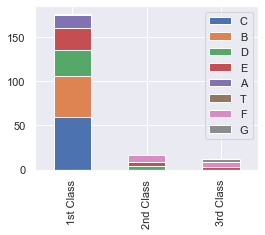

In [73]:
train['Cabin1']=train['Cabin'].str[:1]
Pclass1=train[train['Pclass']==1]['Cabin1'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin1'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin1'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3], index=['1st Class','2nd Class','3rd Class'])
df.plot(kind='bar', stacked=True, figsize=(4,3))

In [76]:
mapping_cabin={'A':0,'B':0.4,'C':0.8,'D':1.2, 'E':1.6,'F':2.0,'G':2.4,'T':2.8}

train['Cabin2']=train['Cabin1'].map(mapping_cabin)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title1,Title2,Title3,Age1,Embarked1,Embarked2,Fare1,Fare2,Cabin1,Cabin2
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,1.0,S,0,0,0.0,NaN,NaN
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,...,2,2,2,3.0,C,1,2,2.0,C,0.8
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,1,1,1.0,S,0,0,0.0,NaN,NaN
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,...,2,2,2,2.0,S,0,2,2.0,C,0.8
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,...,0,0,0,2.0,S,0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,...,3,3,3,2.0,S,0,0,0.0,NaN,NaN
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,...,1,1,1,1.0,S,0,1,1.0,B,0.4
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,...,1,1,1,1.0,S,0,1,1.0,NaN,NaN
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,...,0,0,0,1.0,C,1,1,1.0,C,0.8


In [78]:
train['Cabin2'].fillna(train.groupby('Pclass')['Cabin2'].transform('median'),inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title1           0
Title2           0
Title3           0
Age1             0
Embarked1        0
Embarked2        0
Fare1            0
Fare2            0
Cabin1         687
Cabin2           0
dtype: int64

In [79]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title1,Title2,Title3,Age1,Embarked1,Embarked2,Fare1,Fare2,Cabin1,Cabin2
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,1.0,S,0,0,0.0,NaN,2.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,...,2,2,2,3.0,C,1,2,2.0,C,0.8
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,1,1,1.0,S,0,0,0.0,NaN,2.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,...,2,2,2,2.0,S,0,2,2.0,C,0.8
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,...,0,0,0,2.0,S,0,0,0.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,...,3,3,3,2.0,S,0,0,0.0,NaN,1.8
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,...,1,1,1,1.0,S,0,1,1.0,B,0.4
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,...,1,1,1,1.0,S,0,1,1.0,NaN,2.0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,...,0,0,0,1.0,C,1,1,1.0,C,0.8


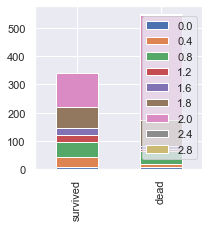

In [80]:
bar_chart('Cabin2')

In [89]:
train['Familysize']=train['SibSp']+train['Parch']+1
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title2,Title3,Age1,Embarked1,Embarked2,Fare1,Fare2,Cabin1,Cabin2,Familysize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1.0,S,0,0,0.0,NaN,2.0,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,...,2,2,3.0,C,1,2,2.0,C,0.8,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,1,1.0,S,0,0,0.0,NaN,2.0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,...,2,2,2.0,S,0,2,2.0,C,0.8,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,...,0,0,2.0,S,0,0,0.0,NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,...,3,3,2.0,S,0,0,0.0,NaN,1.8,1
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,...,1,1,1.0,S,0,1,1.0,B,0.4,1
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,...,1,1,1.0,S,0,1,1.0,NaN,2.0,4
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,...,0,0,1.0,C,1,1,1.0,C,0.8,1


In [91]:
mapping_family={1:0,2:0.4,3:0.8,4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6}
train['Familysize1']=train['Familysize'].map(mapping_family)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title3,Age1,Embarked1,Embarked2,Fare1,Fare2,Cabin1,Cabin2,Familysize,Familysize1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,...,0,1.0,S,0,0,0.0,NaN,2.0,2,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,...,2,3.0,C,1,2,2.0,C,0.8,2,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,1.0,S,0,0,0.0,NaN,2.0,1,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,...,2,2.0,S,0,2,2.0,C,0.8,2,0.4
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,...,0,2.0,S,0,0,0.0,NaN,2.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,...,3,2.0,S,0,0,0.0,NaN,1.8,1,0.0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,...,1,1.0,S,0,1,1.0,B,0.4,1,0.0
888,889,0,3,1,21.0,1,2,W./C. 6607,23.4500,NaN,...,1,1.0,S,0,1,1.0,NaN,2.0,4,1.2
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,...,0,1.0,C,1,1,1.0,C,0.8,1,0.0


In [98]:
train_new=pd.DataFrame(train,columns=['Survived','Pclass','Title2','Sex','Age1','Embarked2','Fare1','Cabin2','Familysize1'])
train_new.columns=['Survived','Pclass','Title','Sex','Age','Embarked','Fare','Cabin','Familysize']
train_new

,Survived,Pclass,Title,Sex,Age,Embarked,Fare,Cabin,Familysize
0,0,3,0,0,1.0,0,0,2.0,0.4
1,1,1,2,1,3.0,1,2,0.8,0.4
2,1,3,1,1,1.0,0,0,2.0,0.0
3,1,1,2,1,2.0,0,2,0.8,0.4
4,0,3,0,0,2.0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,3,0,2.0,0,0,1.8,0.0
887,1,1,1,1,1.0,0,1,0.4,0.0
888,0,3,1,1,1.0,0,1,2.0,1.2
889,1,1,0,0,1.0,1,1,0.8,0.0


In [103]:
train_new.to_excel('C:\wonyoung/train_new.xlsx')